In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-ratings/ratings_Beauty.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
import random

# EDA and preprocessing

In [3]:
df = pd.read_csv('/kaggle/input/amazon-ratings/ratings_Beauty.csv')

In [20]:
print("Column names: %s" % str(df.columns))

Column names: Index(['UserId', 'ProductId', 'Rating', 'Timestamp'], dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [5]:
df.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [6]:
df.head(20)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
6,A1BG8QW55XHN6U,1304139212,5.0,1371945600
7,A22VW0P4VZHDE3,1304139220,5.0,1373068800
8,A3V3RE4132GKRO,130414089X,5.0,1401840000
9,A327B0I7CYTEJC,130414643X,4.0,1389052800


In [7]:
df.tail(20)

,UserId,ProductId,Rating,Timestamp
2023050,A3DEHKPFANB8VA,B00LMXHR1Y,5.0,1405296000
2023051,AU8FV7C2UFVKR,B00LNOKBYW,5.0,1405468800
2023052,A1K3QII0DFSTV2,B00LNOKBYW,5.0,1405728000
2023053,A2UEVIIDLL6J4L,B00LNOKBYW,5.0,1405900800
2023054,ADQ41IJPQW2TN,B00LNOKBYW,5.0,1405728000
2023055,A1NQACPQ21C8AX,B00LNOKBYW,5.0,1405728000
2023056,A2C60HR7WQW9RX,B00LNOKBYW,5.0,1405728000
2023057,A1IO9HRIA7ZJGU,B00LNOKBYW,5.0,1405555200
2023058,A1SJD7QDROVPCC,B00LNOKBYW,5.0,1405296000
2023059,AFPRQT3V8C1U1,B00LNOKBYW,5.0,1405468800


In [8]:
df.shape

(2023070, 4)

In [21]:
unique_user_count = df.UserId.nunique()
unique_product_count = df.ProductId.nunique()

print("Unique UserID count:", unique_user_count)
print("Unique ProductID count:", unique_product_count0)

Unique UserID count: 1210271
Unique ProductID count: 249274


In [19]:
df.ProductId.value_counts()

ProductId
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
              ... 
B004U81OBC       1
B004U7R0EI       1
B004U7Q2O2       1
B004U7NKRE       1
B00LU0LTOU       1
Name: count, Length: 249274, dtype: int64

In [9]:
popular_products = pd.DataFrame(df.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Axes: xlabel='ProductId'>

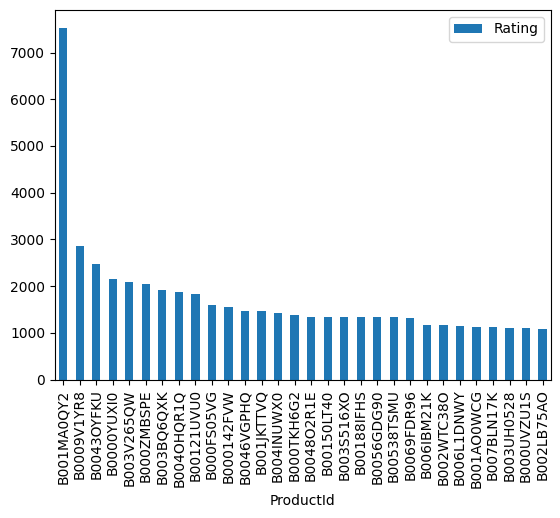

In [10]:
most_popular.head(30).plot(kind = "bar")

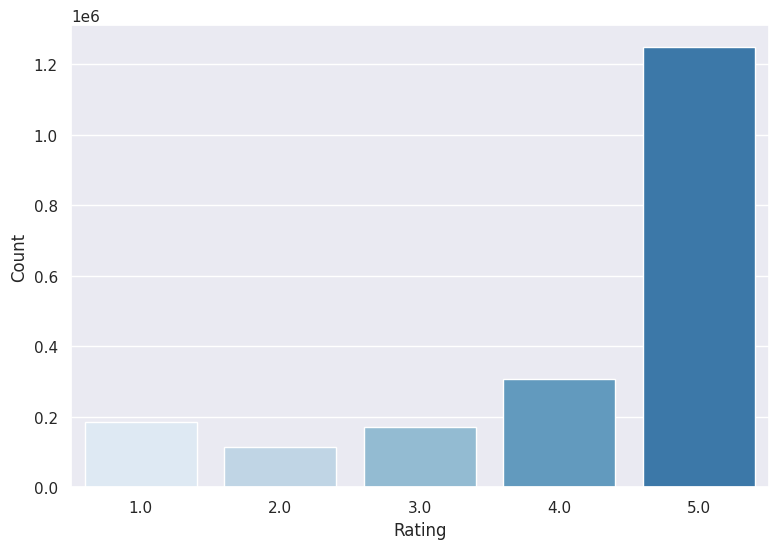

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

rating_counts = df['Rating'].value_counts()

sns.set(rc={'figure.figsize': (9,6)})
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=sns.color_palette('Blues'))
ax.set(xlabel='Rating', ylabel='Count')
plt.show()

# Collaborative Filtering Method

In [11]:
df_sample = df.head(120000)

In [12]:
ratings_utility_matrix = df_sample.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)

In [13]:
ratings_utility_matrix.shape

(108983, 8137)

In [14]:
ratings_utility_matrix.head(20)

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B0006Q05XU,B0006Q06JS,B0006Q0HEC,B0006Q0ILY,B0006Q1KRK,B0006Q232Q,B0006Q23H6,B0006Q23I0,B0006Q23IA,B0006Q3NTS
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A004205218STRNUW6PPPA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00473363TJ8YSZ3YAGG9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00667432UL1ZRFLQA836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00700212KB3K0MVESPIY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0081289HG0BXFQJQUWW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01247753D6GFZD87MUV8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01362343O2D2DRZLC42E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01379141PEJ6FIH7UH38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = ratings_utility_matrix.T
X.shape

(8137, 108983)

In [17]:
X.head()

UserId,A00205921JHJK5X9LNP42,A004205218STRNUW6PPPA,A00473363TJ8YSZ3YAGG9,A00667432UL1ZRFLQA836,A00700212KB3K0MVESPIY,A0081289HG0BXFQJQUWW,A01247753D6GFZD87MUV8,A01362343O2D2DRZLC42E,A01379141PEJ6FIH7UH38,A0143622X8ZC66HZXLUP,...,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZS7W015QH2L,AZZSAMMJPJKJ1,AZZSNN1LC94VF,AZZTJQ7CQZUD8,AZZVCBG5G4EV8,AZZWJ3LICUEKJ,AZZWPNME0GQZ2,AZZZLM1E5JJ8C
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)

In [34]:
decomposed_matrix.shape

(8137, 10)

In [35]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(8137, 8137)

In [36]:
def product_recommender(i, X, correlation_matrix):
    product_ID = X.index[i]
    correlation_ProductId = correlation_matrix[i]
    recommended_products = X.index[correlation_ProductId > 0.90]
    recommended_products = list(recommended_products)
    print(f'recommended products list: {product_ID}')
    print(recommended_products[0:20])

test:

In [38]:
import random
i = random.randint(0,correlation_matrix.shape[0])
product_recommender(i, X, correlation_matrix)

recommended products list: B000141KTK
['1412759676', '6041134473', '604113449X', '6041134511', '8096399322', '8901110814', '9511181564', '9601403787', '9605406446', '974935706X', '9788071511', '9788072208', '9788073239', '9788073409', '9788073417', '9788075622', '978807894X', '9788079970', '9788080669', '9788080928']
